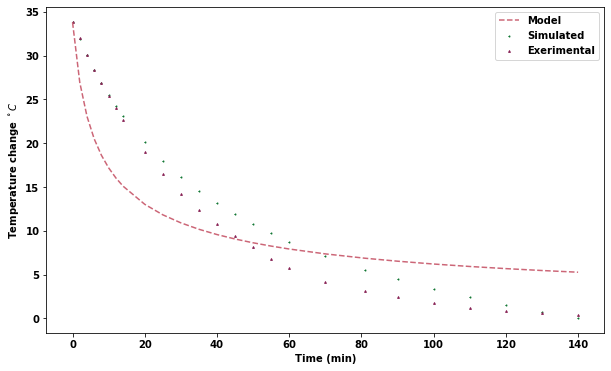

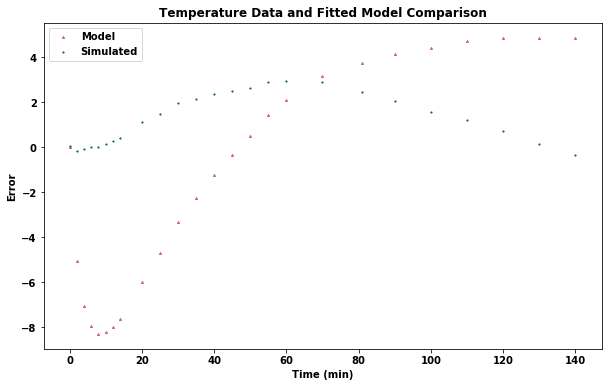

In [24]:

import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
import json

color = tc.tol_cset("muted")
def goussen_point(k, sigma, Temp, x, y, t):
    r = np.sqrt(x * x + y * y)
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r * r) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u

L = 1
x = np.linspace(-L, L, 101)
y = np.linspace(-L, L, 101)
X, Y = np.meshgrid(x, y)

k= 0.03
Temp = 56.3-22.5
time = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
sigma = 0.20898007120809262

Temp_change = []

time = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
for t in time:
    Z = goussen_point(k, sigma, Temp, X, Y, t)
    rect_mask = np.zeros_like(Z)
    rect_mask[np.logical_and(np.abs(X) <= 0.02, np.abs(Y) <= 0.02)] = "NaN"
    # Apply mask to Z data
    masked_Z = np.ma.masked_where(rect_mask == 0, Z)
    mean = np.mean(masked_Z)
    Temp_change.append(mean)

expent_data = np.load("y_data.npy")



TE1 = -10
TE2 = -20
# alpha1 = -2.571829546* 10 ** (-9)
alpha1 = -1.28591439e-09

phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_-10_-20_SE_matching_simulation_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_widening_gaussian_copy_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_1.55_shape_rectangle_phase_data.npy")
tempe = phase/((2.6752218744 * 10**8) * alpha1 * 4 * (TE2- TE1)*10**(-3))

plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(time, tempe, s=3, color=color.green, label='Simulated', marker="4", linewidths=1)
plt.plot(time, Temp_change, ls = '--', color =color.rose , label='Model')
plt.scatter(time, expent_data, s=3, color=color.wine, label='Exerimental', marker="^", linewidths=1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Temperature change $^\circ C$')
# plt.title('Temperature Data and Fitted Model Comparison')

# Add a legend
plt.legend()
# Show the plot
# plt.show()


plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Goussen_model_3_graphs.pdf")

plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(time, Temp_change -expent_data, s=4, color=color.rose,  label='Model', marker="^", linewidths=1)

plt.scatter(time, tempe - expent_data, s=4, color=color.green, label='Simulated', marker="4", linewidths=0.1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Error')
plt.title('Temperature Data and Fitted Model Comparison')

# Add a legend
plt.legend()
# Show the plot
# plt.show()
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Goussen_model_error.pdf")



metadate = {
    'phase data location':"simulations/sim_temp_motion/output/temp_decay/Delay_-10_-20_SE_matching_simulation_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_widening_gaussian_copy_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_1.55_shape_rectangle_phase_data.npy",
    'alpha value': f'{alpha1}',
    "TE times" : f"{TE1} and {TE2}",
    "Temperture": f"phase/((2.6752218744 * 10**8) * {alpha1} * 4 * ({TE2}- {TE1})*10**(-3))",
    "code used to creat mode":"Mininctking_code.ipynb"
}


# Specify the file name
file_name = 'simulations/sim_temp_motion/output/Thesis_graphs/Goussen_mode.json'

# Write the dictionary to a JSON file
with open(file_name, 'w') as json_file:
    json.dump(metadate, json_file, indent=4)

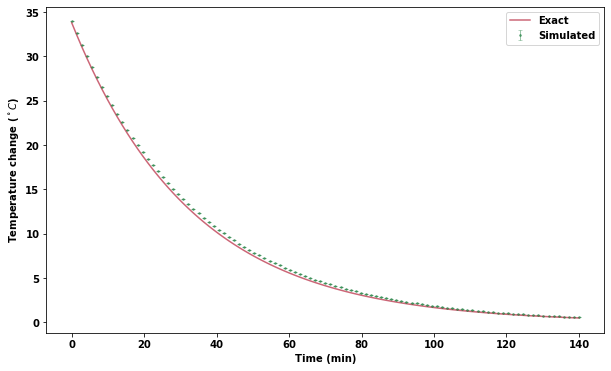

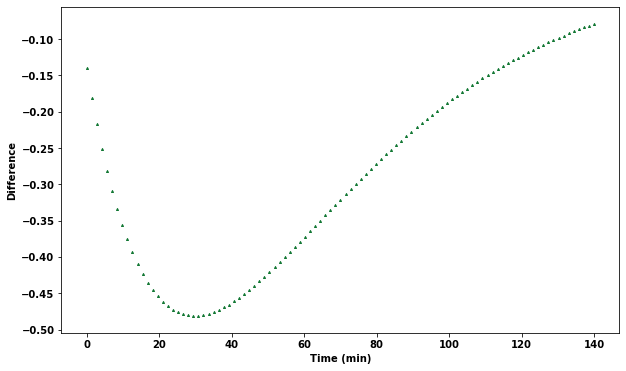

In [23]:

import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
import json

color = tc.tol_cset("muted")

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)



k= 0.03
Temp = 56.3-22.5
# time = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
time =np.linspace(0,140,101)
sigma = 0.20898007120809262

Temp_change = actual_point(time, Temp, k) 



expent_data = np.load("y_data.npy")



TE1 = 10
TE2 = 20
# alpha1 = -2.571829546* 10 ** (-9)
alpha1 = -1.28591439e-09

phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_1.56e+00_shape_rectangle_-1.0300000000000001e-08_phase_data.npy")
# tempe = phase/((2.6752218744 * 10**8) * alpha1 * 4 * (TE2- TE1)*10**(-3))
uncertnaty = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_1.56e+00_shape_rectangle_-1.0300000000000001e-08_uncertanty_data.npy")
plt.figure(figsize=(10, 6))

# Plot the data
plt.errorbar(x=time, y=phase, yerr=uncertnaty*3, fmt=".", mfc = color.green, mec = color.green,  ecolor = color.green,  ms = 4, elinewidth=0.7, label = "Simulated",
             capsize=2, markeredgewidth=0.5, alpha = 0.6)

plt.plot(time, Temp_change, ls = '-', color =color.rose , label='Exact')

# plt.plot(time, Temp_change, ls = '--', color =color.green , label='Model')
# plt.scatter(time, expent_data, s=3, color=color.wine, label='Exerimental', marker="^", linewidths=1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Temperature change $(^\circ C)$')
# plt.title('Temperature Data and Fitted Model Comparison')

# Add a legend
plt.legend()
# Show the plot
# plt.show()


plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exp_model_2_graphs_non_experiemnta_data_SE.pdf")

plt.figure(figsize=(10, 6))

# # Plot the data
plt.scatter(time, Temp_change -phase, s=4, color=color.green,  label='Model', marker="^", linewidths=1)

# plt.scatter(time, tempe - expent_data, s=4, color=color.green, label='Simulated', marker="4", linewidths=0.1)

# # Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Difference')
# plt.title('Temperature Data and Fitted Model Comparison')

# # Add a legend
# plt.legend()
# Show the plot
# plt.show()
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exponemtal_model_error_non_experiemnta_data_SE.pdf")

# Delay_0_20_SE_matching_simulation_copy-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_-1.0300000000000001e-08_exp_No_phase_data
# Delay_10_20_SE_matching_simulation_copy-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_-1.0300000000000001e-08_exp_No_uncertanty_data

# TE_70_80_3DGRE-Tref_22.5-T_56.4res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_10000000000.0_shape_rectangle_unceranty_data
# Delay_10_20_SE_matching_simulation_copy-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_-1.0300000000000001e-08_exp_No_uncertanty_data
metadate = {
    'phase data location':"simulations/sim_temp_motion/output/temp_decay/TE_70_80_3DGRE-Tref_22.5-T_56.4res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_10000000000.0_shape_rectangle_phase_data.npy",
    'uncertnaty' : "3*simulations/sim_temp_motion/output/temp_decay/TE_70_80_3DGRE-Tref_22.5-T_56.4res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_10000000000.0_shape_rectangle_unceranty_data.npy",
    'alpha value': f'{alpha1}',
    "TE times" : f"{TE1} and {TE2}",
    "Temperture": f"phase/((2.6752218744 * 10**8) * {alpha1} * 4 * ({TE2}- {TE1})*10**(-3))",
    "code used to creat mode":"Mininctking_code.ipynb"
}


# Specify the file name
# file_name = 'simulations/sim_temp_motion/output/Thesis_graphs/Exp_mode_non_experiemnta_data_GRE.json'

# # Write the dictionary to a JSON file
# with open(file_name, 'w') as json_file:
#     json.dump(metadate, json_file, indent=4)

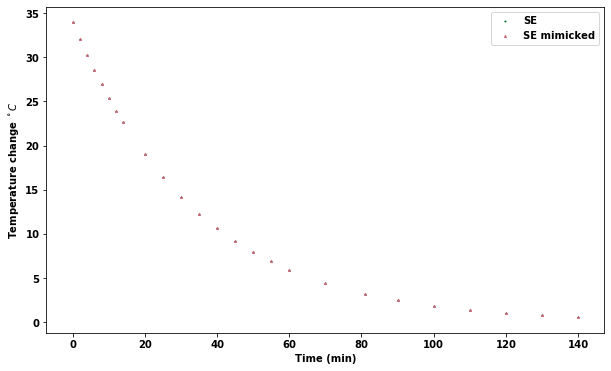

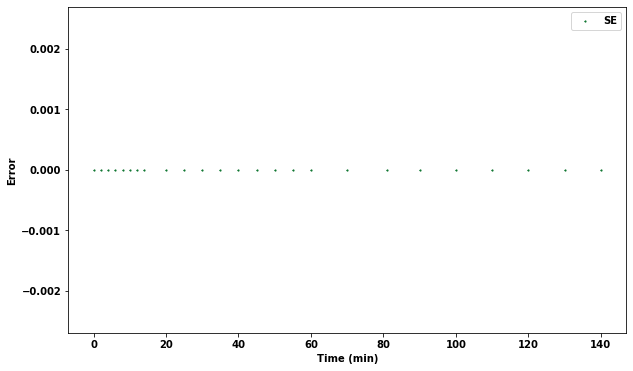

In [76]:

import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
import json

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)




expent_data = np.load("y_data.npy")



TE1 = 10
TE2 = 20
alpha2 = -2.571829546* 10 ** (-9)
alpha1 = -1.28591439e-09

phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy")
tempe = phase/((2.6752218744 * 10**8) * alpha1 * 4 * (TE2- TE1)*10**(-3))

phase2 = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_SE_matching_simulation_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy")
tempe2 = phase/((2.6752218744 * 10**8) * alpha1 * 4 * (TE2- TE1)*10**(-3))

plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(time, tempe, s=3, color=color.green, label='SE', marker="4", linewidths=1)
plt.scatter(time, tempe2, s=4, color=color.rose,  label='SE mimicked', marker="^", linewidths=1)
# plt.scatter(time, expent_data, s=3, color=color.wine, label='Exerimental', marker="^", linewidths=1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Temperature change $^\circ C$')
# plt.title('Temperature Data and Fitted Model Comparison')

# Add a legend
plt.legend()
# Show the plot
# plt.show()


# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exp_model_3_graphs.pdf")

plt.figure(figsize=(10, 6))

# Plot the data
# plt.scatter(time, tempe2 -expent_data, s=4, color=color.rose,  label='SE mimicked', marker="0", linewidths=1)
plt.scatter(time, tempe - tempe2, s=4, color=color.green, label='SE', marker="4", linewidths=0.1)


diff_sequ = tempe - tempe2

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Error')
# plt.title('Temperature Data and Fitted Model Comparison')

# # Add a legend
plt.legend()
# Show the plot
# plt.show()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exp_model_error.pdf")



# metadate = {
#     'phase data location':"simulations/sim_temp_motion/output/temp_decay/elay_10_20_3DSE_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy",
#     'alpha value': f'{alpha1}',
#     "TE times" : f"{TE1} and {TE2}",
#     "Temperture": f"phase/((2.6752218744 * 10**8) * {alpha1} * 4 * ({TE2}- {TE1})*10**(-3))",
#     "code used to creat mode":"Mininctking_code.ipynb"
# }


# Specify the file name
# file_name = 'simulations/sim_temp_motion/output/Thesis_graphs/Exp_mode.json'

# # Write the dictionary to a JSON file
# with open(file_name, 'w') as json_file:
#     json.dump(metadate, json_file, indent=4)

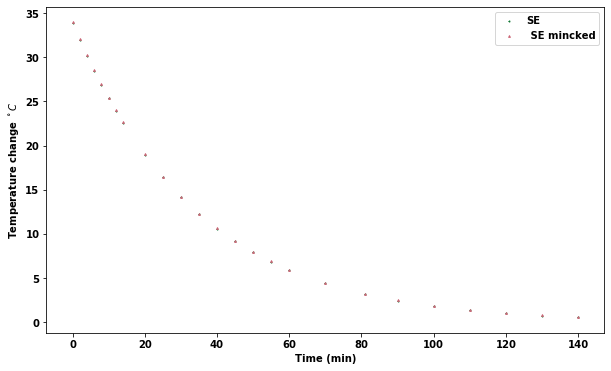

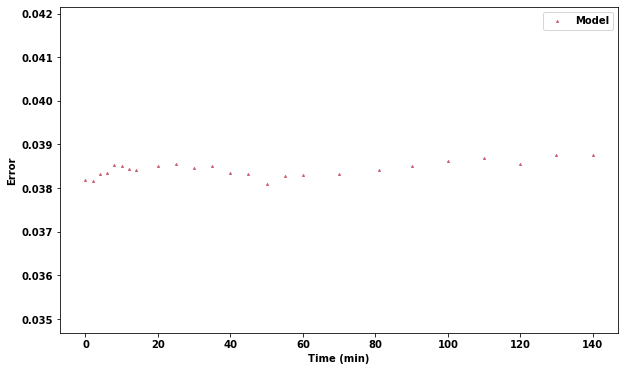

In [82]:

import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
import json

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)




expent_data = np.load("y_data.npy")



TE1 = 10
TE2 = 20
alpha2 = -2.571829546* 10 ** (-9)
alpha1 = -1.28591439e-09

# phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_0_20_SE_matching_simulation_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy")

phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy")

tempe = phase/((2.6752218744 * 10**8) * alpha2 * 4 * (TE2-TE1)*10**(-3))

phase2 = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_10_20_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy")
tempe2 = phase2/((2.6752218744 * 10**8) * alpha2 * 4 * (TE2-TE1)*10**(-3))

plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(time, tempe, s=3, color=color.green, label='SE', marker="4", linewidths=1)
plt.scatter(time, tempe2, s = 3, color =color.rose , label=' SE mincked',  marker="^", linewidths=1)
# plt.scatter(time, expent_data, s=3, color=color.wine, label='Exerimental', marker="^", linewidths=1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Temperature change $^\circ C$')
# plt.title('Temperature Data and Fitted Model Comparison')

# Add a legend
plt.legend()
# Show the plot
# plt.show()


# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exp_model_3_graphs.pdf")

plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(time, tempe2 - tempe, s=4, color=color.rose,  label='Model', marker="^", linewidths=1)
diff_in_TE_time = tempe2 - tempe
diff_relaxation = tempe2 - tempe
# plt.scatter(time, tempe - expent_data, s=4, color=color.green, label='Simulated', marker="4", linewidths=0.1)

# Add labels and title
plt.xlabel('Time (min)')
plt.ylabel('Error')
# plt.title('Temperature Data and Fitted Model Comparison')

# # Add a legend
plt.legend()
# Show the plot
# plt.show()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Exp_model_error.pdf")



# metadate = {
#     'phase data location':"simulations/sim_temp_motion/output/temp_decay/elay_10_20_3DSE_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_time_decay_T1_2.01744_T2_0.071524_bc_time_unit_ms_bc_sigma_0.00e+00_shape_rectangle_phase_data.npy",
#     'alpha value': f'{alpha1}',
#     "TE times" : f"{TE1} and {TE2}",
#     "Temperture": f"phase/((2.6752218744 * 10**8) * {alpha1} * 4 * ({TE2}- {TE1})*10**(-3))",
#     "code used to creat mode":"Mininctking_code.ipynb"
# }


# Specify the file name
# file_name = 'simulations/sim_temp_motion/output/Thesis_graphs/Exp_mode.json'

# # Write the dictionary to a JSON file
# with open(file_name, 'w') as json_file:
#     json.dump(metadate, json_file, indent=4)

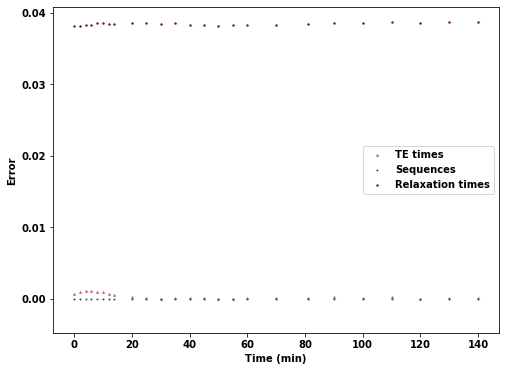

In [94]:

plt.figure(figsize=(8, 6))

plt.scatter(time, diff_in_TE_time, s = 3, color =color.rose , label='TE times',  marker="^", linewidths=1)
plt.scatter(time, diff_sequ, s=3, color=color.green, label='Sequences', marker="4", linewidths=1)

plt.scatter(time, diff_relaxation, s = 3, color =color.wine , label='Relaxation times',  marker="*", linewidths=1)


plt.xlabel('Time (min)')
plt.ylabel('Error')
# plt.title('Temperature Data and Fitted Model Comparison')

# # Add a legend
plt.legend()
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Comparing_diff_parame.pdf")


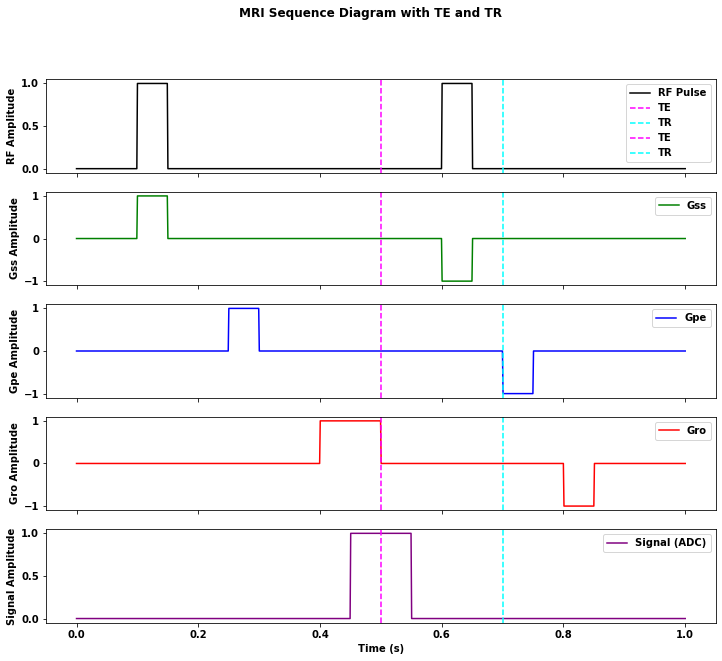

In [ ]:

B0 = 9.4
delay2 = 20
delay1 = 0
phase_value= -3
T_data  = (np.array(phase_value) )/((2.6752218744 * 10**8) * alpha1 * B0 * (delay2- delay1)*10**(-3))
